In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


import os
from math import * 
os.getcwd()
print("The current directory is: ")
print(os.getcwd())
path_parent = os.path.dirname(os.getcwd())
os.chdir(path_parent)
print("Moving up to the parent directory")
print(os.getcwd())

The current directory is: 
c:\Users\nguye\Desktop\Crystal-Plasticity-COE-Project\notebooks
Moving up to the parent directory
c:\Users\nguye\Desktop\Crystal-Plasticity-COE-Project


In [2]:
yieldingPoint = 0.004

def getIndexBeforeStrainLevel(strain, level):
    for i in range(len(strain)):
        if strain[i] > level:
            return i - 1
def preprocessNonlinear(trueStrain, trueStress, strainPathX, strainPathY, strainPathZ):
    strainPathXprocess = strainPathX.copy()
    strainPathYprocess = strainPathY.copy()
    strainPathZprocess = strainPathZ.copy()
    turningIndices = turningStressPoints(trueStress)
    #print(turningIndices)
    #unloadingIndex = turningIndices[0]
    reloadingIndex = turningIndices[1]
    for i in range(reloadingIndex, trueStrain.size):
        strainPathXprocess[i] -= strainPathX[reloadingIndex]
        strainPathYprocess[i] -= strainPathY[reloadingIndex]
        strainPathZprocess[i] -= strainPathZ[reloadingIndex]
    strainReloading = (2/3 * (strainPathXprocess ** 2 + strainPathYprocess ** 2 + strainPathZprocess ** 2)) ** (1/2) + trueStrain[reloadingIndex]
    actualStrain = trueStrain.copy()
    for i in range(reloadingIndex, trueStrain.size):
        actualStrain[i] = strainReloading[i]
    return (actualStrain, trueStress)

def turningStressPoints(trueStress):
    differences = np.diff(trueStress)
    index = 1
    turningIndices = []
    while index < differences.size:
        if (differences[index - 1] <= 0 and differences[index] >= 0) or (differences[index - 1] >= 0 and differences[index] <= 0):
            turningIndices.append(index)
        index += 1
    return turningIndices

def preprocessDAMASKNonlinear(path):
    df = pd.read_csv(path, skiprows = 6, delimiter = "\t")
    trueStrain = df["Mises(ln(V))"].to_numpy().reshape(-1)
    trueStress = df["Mises(Cauchy)"].to_numpy().reshape(-1)
    strainPathX = df["1_ln(V)"].to_numpy().reshape(-1)
    strainPathY = df["5_ln(V)"].to_numpy().reshape(-1)
    strainPathZ = df["9_ln(V)"].to_numpy().reshape(-1)
    return preprocessNonlinear(trueStrain, trueStress, strainPathX, strainPathY, strainPathZ)

################################
# Preprocessing linear loading #
################################

def preprocessLinear(trueStrain, trueStress):
    # truePlasticStrain = trueStrain - trueElasticstrain = trueStrain - trueStress/Young's modulus
    Young = (trueStress[1] - trueStress[0]) / (trueStrain[1] - trueStrain[0])
    truePlasticStrain = trueStrain - trueStress / Young    
    return (truePlasticStrain, trueStress)

def preprocessDAMASKLinear(path):
    df = pd.read_csv(path, skiprows = 6, delimiter = "\t")
    trueStrain = df["Mises(ln(V))"].to_numpy().reshape(-1)
    trueStress = df["Mises(Cauchy)"].to_numpy().reshape(-1)
    return preprocessLinear(trueStrain, trueStress)   

##############################
# Obtain the original curves #
##############################

def preprocessDAMASKTrue(path):
    df = pd.read_csv(path, skiprows = 6, delimiter = "\t")
    trueStrain = df["Mises(ln(V))"]
    trueStress = df["Mises(Cauchy)"] 
    return (trueStrain, trueStress)



## Parameter analysis in the PH model

### Note: no need to multiply stress by 1e-6

In [25]:
# To comment multiple lines, press Ctrl + K + C
# To uncomment multiple lines, press Ctrl + K + U

size = 18

# Parameter a
paramValues = ["1.1","2","3"] # <- put the postprocessed files here and rename to the param's value change. Remmeber to keep the exponent
paramName = "a" # <- Change this to the correct parameter. Look up paramNames in GUI.py 
paramNameLatex = "a" # <- Change this to the correct formatted name. Look up paramsFormatted in GUI.py
paramUnit = "" # <- Change this to the correct unit. Look up paramsUnit in GUI.py
legendsize = -2
ncol = 1

# Parameter h₀
# paramValues = ["200","400","800"] # <- put the postprocessed files here and rename to the param's value change. Remmeber to keep the exponent
# paramName = "h0" # <- Change this to the correct parameter. Look up paramNames in GUI.py 
# paramNameLatex = "h₀" # <- Change this to the correct formatted name. Look up paramsFormatted in GUI.py
# paramUnit = "" # <- Change this to the correct unit. Look up paramsUnit in GUI.py
# legendsize = -2
# ncol = 1

# Parameter τₛₐₜ
# paramValues = ["200","300","400"] # <- put the postprocessed files here and rename to the param's value change. Remmeber to keep the exponent
# paramName = "tausat" # <- Change this to the correct parameter. Look up paramNames in GUI.py 
# paramNameLatex = "τₛₐₜ" # <- Change this to the correct formatted name. Look up paramsFormatted in GUI.py
# paramUnit = "MPa" # <- Change this to the correct unit. Look up paramsUnit in GUI.py
# legendsize = -2
# ncol = 1

# parameter self 
# paramValues = ["0.25","0.75","1.5"]
# paramName = "self" # <- Change this to the correct parameter. Look up paramNames in GUI.py 
# paramNameLatex = "self" # <- Change this to the correct formatted name. Look up paramsFormatted in GUI.py
# paramUnit = "" # <- Change this to the correct unit. Look up paramsUnit in GUI.py
# legendsize = -2
# ncol = 1

#parameter coplanar
# paramValues = ["0.01","1","2"]
# paramName = "coplanar" # <- Change this to the correct parameter. Look up paramNames in GUI.py 
# paramNameLatex = "coplanar" # <- Change this to the correct formatted name. Look up paramsFormatted in GUI.py
# paramUnit = "" # <- Change this to the correct unit. Look up paramsUnit in GUI.py
# legendsize = -2
# ncol = 1

# parameter collinear
# paramValues = ["0.01","5","25"]
# paramName = "collinear" # <- Change this to the correct parameter. Look up paramNames in GUI.py 
# paramNameLatex = "collinear" # <- Change this to the correct formatted name. Look up paramsFormatted in GUI.py
# paramUnit = "" # <- Change this to the correct unit. Look up paramsUnit in GUI.py
# legendsize = -2
# ncol = 1

# parameter orthogonal
# paramValues= ["0.01","1","3"]
# paramName = "orthogonal" # <- Change this to the correct parameter. Look up paramNames in GUI.py 
# paramNameLatex = "orthogonal" # <- Change this to the correct formatted name. Look up paramsFormatted in GUI.py
# paramUnit = "" # <- Change this to the correct unit. Look up paramsUnit in GUI.py
# legendsize = -2
# ncol = 1

# parameter glissile
# paramValues = ["0.01","1","3"]
# paramName = "glissile" # <- Change this to the correct parameter. Look up paramNames in GUI.py 
# paramNameLatex = "glissile" # <- Change this to the correct formatted name. Look up paramsFormatted in GUI.py
# paramUnit = "" # <- Change this to the correct unit. Look up paramsUnit in GUI.py
# legendsize = -2
# ncol = 1

# parameter sessile
# paramValues = ["0.01","1","3"]
# paramName = "sessile" # <- Change this to the correct parameter. Look up paramNames in GUI.py 
# paramNameLatex = "sessile" # <- Change this to the correct formatted name. Look up paramsFormatted in GUI.py
# paramUnit = "" # <- Change this to the correct unit. Look up paramsUnit in GUI.py
# legendsize = -2
# ncol = 1

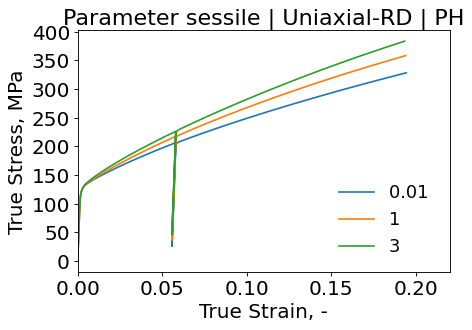

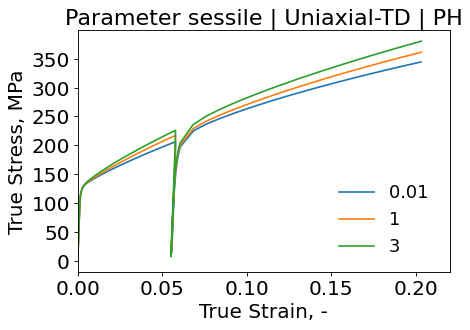

In [26]:
# Plotting uniaxial-RD loading
figure(figsize=(6, 4), dpi=80)
for paramValue in paramValues: 
    path = f"notebooks/parameters_analysis_UAT_RD/PH/{paramName}/{paramValue}.txt"
    trueStrain, trueStress = preprocessDAMASKNonlinear(path)
    plt.plot(trueStrain, trueStress, label = f"{paramValue} {paramUnit}")

plt.title(f"Parameter {paramNameLatex} | Uniaxial-RD | PH", size=size + 2)
plt.xticks([0, 0.05, 0.1, 0.15, 0.2, 0.25], fontsize=size)    
plt.yticks(fontsize=size)  
plt.xlim([0, 0.22])

plt.ylabel('True Stress, MPa', size=size)
plt.xlabel("True Strain, -", size=size)
legend = plt.legend(loc=4, frameon=False, fontsize=size + legendsize, ncol=ncol, facecolor='white')
legend.get_frame().set_linewidth(0.0)

# Plotting uniaxial-TD loading
figure(figsize=(6, 4), dpi=80)
for paramValue in paramValues: 
    path = f"notebooks/parameters_analysis_UAT_TD/PH/{paramName}/{paramValue}.txt"
    trueStrain, trueStress = preprocessDAMASKNonlinear(path)
    plt.plot(trueStrain, trueStress, label = f"{paramValue} {paramUnit}")

plt.title(f"Parameter {paramNameLatex} | Uniaxial-TD | PH", size=size + 2)
plt.xticks([0, 0.05, 0.1, 0.15, 0.2, 0.25], fontsize=size)    
plt.yticks(fontsize=size)  
plt.xlim([0, 0.22])

plt.ylabel('True Stress, MPa', size=size)
plt.xlabel("True Strain, -", size=size)
legend = plt.legend(loc=4, frameon=False, fontsize=size + legendsize, ncol=ncol, facecolor='white')
legend.get_frame().set_linewidth(0.0)


### Note: need to multiply stress by 1e-6

## Parameter analysis in the DB model

In [48]:
# To comment multiple lines, press Ctrl + K + C
# To uncomment multiple lines, press Ctrl + K + U

size = 18

# Parameter dα
paramValues = ["1","4","7"] 
paramName = "dipole"
paramNameLatex = "dα"
paramUnit = "b"
legendsize = -2
ncol = 1

# Parameter iₛₗᵢₚ
# paramValues = ["80","100","400"]
# paramName = "islip"
# paramNameLatex = "iₛₗᵢₚ"
# paramUnit = ""
# legendsize = -2
# ncol = 1

# Parameter Ω
# paramValues = ["0.01","1","5"] 
# paramName = "omega"
# paramNameLatex = "Ω"
# paramUnit = "b³"
# legendsize = -2
# ncol = 1

# parameter Qc
# paramValues = ["1.8","1.85", "1.9"]
# paramName = "Qc"
# paramNameLatex = "Qc"
# paramUnit = "J"
# legendsize = -2
# ncol = 1

# parameter D₀
# paramValues = ["10","25","50"]
# paramName = "D0"
# paramNameLatex = "D₀"
# paramUnit = "m²/s"
# legendsize = -2
# ncol = 1

# parameter self 
# paramValues = ["0.25","0.75","1.5"]
# paramName = "self" # <- Change this to the correct parameter. Look up paramNames in GUI.py 
# paramNameLatex = "self" # <- Change this to the correct formatted name. Look up paramsFormatted in GUI.py
# paramUnit = "" # <- Change this to the correct unit. Look up paramsUnit in GUI.py
# legendsize = -2
# ncol = 1

#parameter coplanar
# paramValues = ["0.01","1","2"]
# paramName = "coplanar" # <- Change this to the correct parameter. Look up paramNames in GUI.py 
# paramNameLatex = "coplanar" # <- Change this to the correct formatted name. Look up paramsFormatted in GUI.py
# paramUnit = "" # <- Change this to the correct unit. Look up paramsUnit in GUI.py
# legendsize = -2
# ncol = 1

# parameter collinear
# paramValues = ["0.01","1","5"]
# paramName = "collinear" # <- Change this to the correct parameter. Look up paramNames in GUI.py 
# paramNameLatex = "collinear" # <- Change this to the correct formatted name. Look up paramsFormatted in GUI.py
# paramUnit = "" # <- Change this to the correct unit. Look up paramsUnit in GUI.py
# legendsize = -2
# ncol = 1

# parameter orthogonal
# paramValues= ["0.01","1","3"]
# paramName = "orthogonal" # <- Change this to the correct parameter. Look up paramNames in GUI.py 
# paramNameLatex = "orthogonal" # <- Change this to the correct formatted name. Look up paramsFormatted in GUI.py
# paramUnit = "" # <- Change this to the correct unit. Look up paramsUnit in GUI.py
# legendsize = -2
# ncol = 1

# parameter glissile
# paramValues = ["0.01","1","3"]
# paramName = "glissile" # <- Change this to the correct parameter. Look up paramNames in GUI.py 
# paramNameLatex = "glissile" # <- Change this to the correct formatted name. Look up paramsFormatted in GUI.py
# paramUnit = "" # <- Change this to the correct unit. Look up paramsUnit in GUI.py
# legendsize = -2
# ncol = 1

# parameter sessile
# paramValues = ["0.01","1","3"]
# paramName = "sessile" # <- Change this to the correct parameter. Look up paramNames in GUI.py 
# paramNameLatex = "sessile" # <- Change this to the correct formatted name. Look up paramsFormatted in GUI.py
# paramUnit = "" # <- Change this to the correct unit. Look up paramsUnit in GUI.py
# legendsize = -2
# ncol = 1

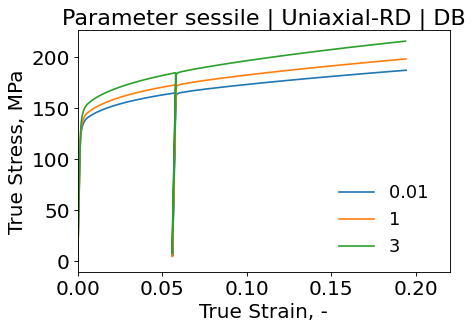

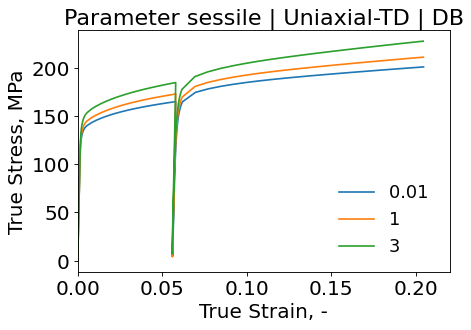

In [49]:
# Plotting uniaxial-RD loading
figure(figsize=(6, 4), dpi=80)
for paramValue in paramValues: 
    path = f"notebooks/parameters_analysis_UAT_RD/DB/{paramName}/{paramValue}.txt"
    trueStrain, trueStress = preprocessDAMASKNonlinear(path)
    trueStress *= 1e-6
    plt.plot(trueStrain, trueStress, label = f"{paramValue} {paramUnit}")

plt.title(f"Parameter {paramNameLatex} | Uniaxial-RD | DB", size=size + 2)
plt.xticks([0, 0.05, 0.1, 0.15, 0.2, 0.25], fontsize=size)    
plt.yticks(fontsize=size)  
plt.xlim([0, 0.22])

plt.ylabel('True Stress, MPa', size=size)
plt.xlabel("True Strain, -", size=size)
legend = plt.legend(loc=4, frameon=False, fontsize=size + legendsize, ncol=ncol, facecolor='white')
legend.get_frame().set_linewidth(0.0)

# Plotting uniaxial-TD loading
figure(figsize=(6, 4), dpi=80)
for paramValue in paramValues: 
    path = f"notebooks/parameters_analysis_UAT_TD/DB/{paramName}/{paramValue}.txt"
    trueStrain, trueStress = preprocessDAMASKNonlinear(path)
    trueStress *= 1e-6
    plt.plot(trueStrain, trueStress, label = f"{paramValue} {paramUnit}")

plt.title(f"Parameter {paramNameLatex} | Uniaxial-TD | DB", size=size + 2)
plt.xticks([0, 0.05, 0.1, 0.15, 0.2, 0.25], fontsize=size)    
plt.yticks(fontsize=size)  
plt.xlim([0, 0.22])

plt.ylabel('True Stress, MPa', size=size)
plt.xlabel("True Strain, -", size=size)
legend = plt.legend(loc=4, frameon=False, fontsize=size + legendsize, ncol=ncol, facecolor='white')
legend.get_frame().set_linewidth(0.0)